# **Data Preprocessing**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.tsv', sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
(df['label'].value_counts()/len(df))*100
#so this data set is not labeled 

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

In [8]:
df[df['label'] =='ham']

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [9]:
ham=df[df['label'] =='ham']

In [10]:
spam=df[df['label'] =='spam']

In [11]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [12]:
ham=ham.sample(spam.shape[0])

In [13]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [14]:
print(type(ham))
print(type(spam))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [15]:
data=pd.concat([ham, spam], ignore_index=True)

In [16]:
data.shape

(1494, 4)

In [17]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [18]:
data.head()

,label,message,length,punct
0,ham,I'm still looking for a car to buy. And have n...,76,3
1,ham,Nope i'll come online now..,27,3
2,ham,Ok...,5,3
3,ham,"Probably not, still going over some stuff here",46,1
4,ham,Aiyah ok wat as long as got improve can alread...,54,3


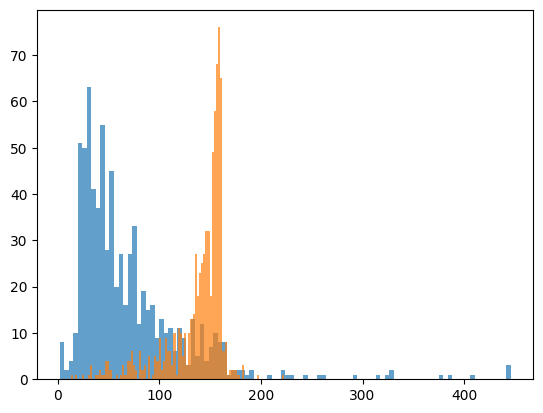

In [19]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

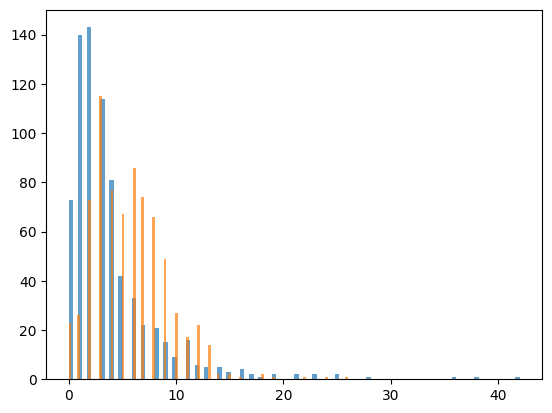

In [20]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [21]:
data

,label,message,length,punct
0,ham,I'm still looking for a car to buy. And have n...,76,3
1,ham,Nope i'll come online now..,27,3
2,ham,Ok...,5,3
3,ham,"Probably not, still going over some stuff here",46,1
4,ham,Aiyah ok wat as long as got improve can alread...,54,3
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [27]:
x_train.shape,x_test.shape

((1045,), (449,))

# **Building the Model (Random Forest)** 